In [142]:
import gzip, pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

with gzip.open('mnist_rowmajor.pkl.gz', 'rb') as data_fh:
    data = pickle.load(data_fh, encoding='latin1')

train_images = data['images_train']
train_labels = data['labels_train']

images_train, images_dev, labels_train, labels_dev = train_test_split(train_images, train_labels, test_size=0.20, random_state=4)
images_test = data['images_test']
labels_test = data['labels_test']
# print(len(images_train))
# print(len(images_dev))
# print(len(labels_train))
# print(len(labels_dev))
# print(len(images_test))
# print(len(labels_test))

TRAIN_LENGTH = len(images_train)
DEV_LENGTH = len(images_dev)
TEST_LENGTH = len(images_test)

In [135]:
# Feature 1: Signing images
feature1_training_set = np.empty((TRAIN_LENGTH, 784))
for idx, i in enumerate(images_train):
    signed_image_train = list(map((lambda x: 1 if (x > 0) else 0), i))
    feature1_training_set[idx] = signed_image_train

feature1_dev_set = np.empty((DEV_LENGTH, 784))
for idx, i in enumerate(images_dev):
    signed_image_dev = list(map((lambda x: 1 if (x > 0) else 0), i))
    feature1_dev_set[idx] = signed_image_dev
    


In [144]:
feature1_test_set = np.zeros((TEST_LENGTH, 784))
for idx, i in enumerate(images_test):
    signed_image_test = list(map((lambda x: 1 if (x > 0) else 0), i))
    feature1_test_set[idx] = signed_image_test
    
complete_training = np.zeros((60000, 784))
for idx, i in enumerate(train_images):
    temp = list(map((lambda x: 1 if (x > 0) else 0), i))
    complete_training[idx] = temp

In [107]:
# Feature 2: transform if i,j & p,q > 0
def transform(row):
    arr = np.zeros((783))
    for k in range(len(row) - 1):
        if(row[k] > 0 and row[k + 1] > 0):
            arr[k] = 1
        else:
            arr[k] = 0
    return arr

feature2_training_set = np.zeros((TRAIN_LENGTH, 783))
for idx, image in enumerate(images_train):
    image = transform(image)
    feature2_training_set[idx] = image

feature2_dev_set = np.zeros((DEV_LENGTH, 783))
for idx, image in enumerate(images_dev):
    image = transform(image)
    feature2_dev_set[idx] = image

In [108]:
def experimentEvaluation(y_correct, y_pred):
    cm = confusion_matrix(y_correct.flatten(), y_pred.flatten())
    df_cm = pd.DataFrame(cm.astype(int), range(10), range(10))
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="d")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    accuracy = accuracy_score(y_correct.flatten(), y_pred.flatten())
    print('Accuracy: ', accuracy)
    print(classification_report(y_correct.flatten(), y_pred.flatten()))

c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


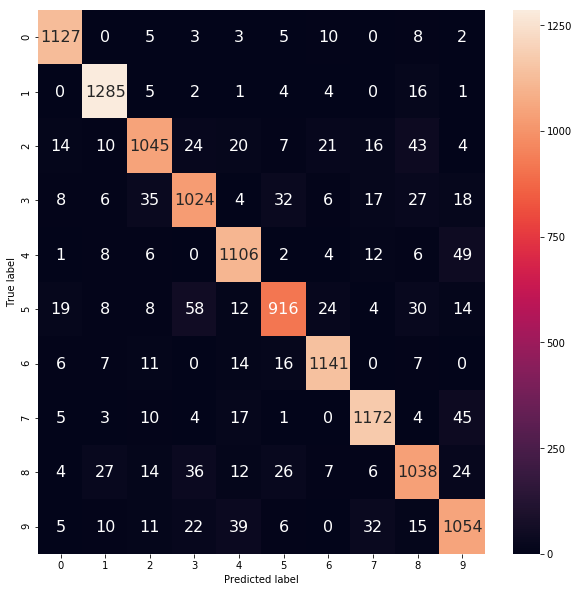

Accuracy:  0.909
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1163
           1       0.94      0.97      0.96      1318
           2       0.91      0.87      0.89      1204
           3       0.87      0.87      0.87      1177
           4       0.90      0.93      0.91      1194
           5       0.90      0.84      0.87      1093
           6       0.94      0.95      0.94      1202
           7       0.93      0.93      0.93      1261
           8       0.87      0.87      0.87      1194
           9       0.87      0.88      0.88      1194

   micro avg       0.91      0.91      0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [122]:
# Configuration 1: feature = signed images, regularization = l1
logisticRegression = LogisticRegression(penalty = 'l1')
logisticRegression.fit(feature1_training_set, labels_train)
predictionsConfig1 = logisticRegression.predict(feature1_dev_set)
experimentEvaluation(labels_dev, predictionsConfig1)

c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


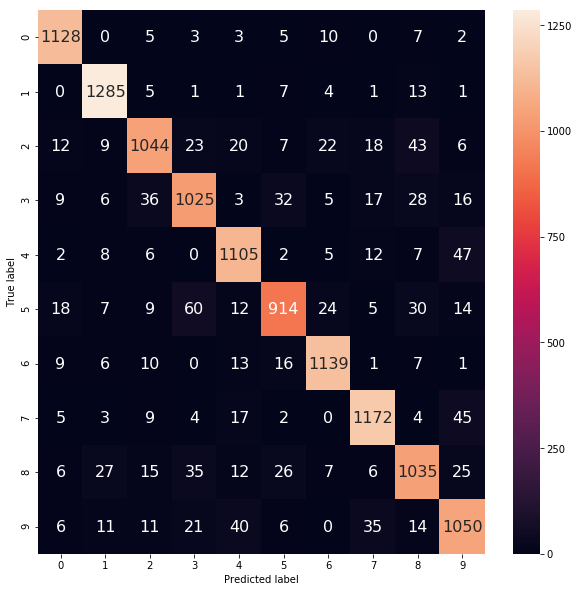

Accuracy:  0.9080833333333334
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1163
           1       0.94      0.97      0.96      1318
           2       0.91      0.87      0.89      1204
           3       0.87      0.87      0.87      1177
           4       0.90      0.93      0.91      1194
           5       0.90      0.84      0.87      1093
           6       0.94      0.95      0.94      1202
           7       0.93      0.93      0.93      1261
           8       0.87      0.87      0.87      1194
           9       0.87      0.88      0.87      1194

   micro avg       0.91      0.91      0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [73]:
# Configuration 2: feature = signed images, regularization = l2
logisticRegression = LogisticRegression(penalty = 'l2')
logisticRegression.fit(feature1_training_set, labels_train)
predictionsConfig2 = logisticRegression.predict(feature1_dev_set)
experimentEvaluation(labels_dev, predictionsConfig2)

c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


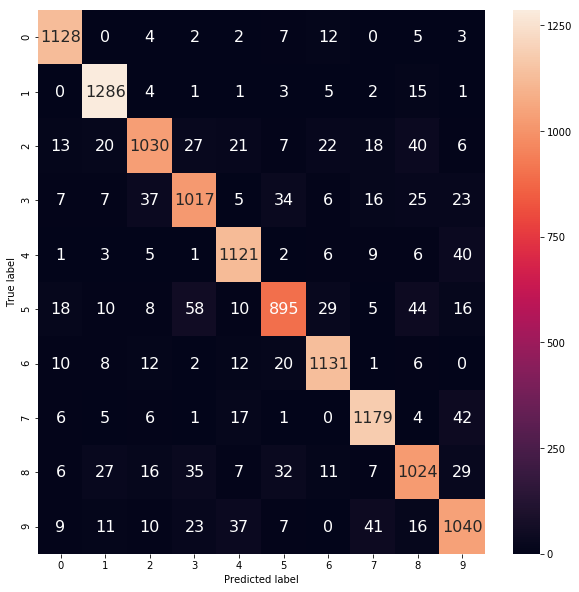

Accuracy:  0.90425
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1163
           1       0.93      0.98      0.95      1318
           2       0.91      0.86      0.88      1204
           3       0.87      0.86      0.87      1177
           4       0.91      0.94      0.92      1194
           5       0.89      0.82      0.85      1093
           6       0.93      0.94      0.93      1202
           7       0.92      0.93      0.93      1261
           8       0.86      0.86      0.86      1194
           9       0.87      0.87      0.87      1194

   micro avg       0.90      0.90      0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [109]:
# Configuration 3: feature = transformed images, regularization = l1
logisticRegression = LogisticRegression(penalty = 'l1')
logisticRegression.fit(feature2_training_set, labels_train)
predictionsConfig3 = logisticRegression.predict(feature2_dev_set)
experimentEvaluation(labels_dev, predictionsConfig3)

c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


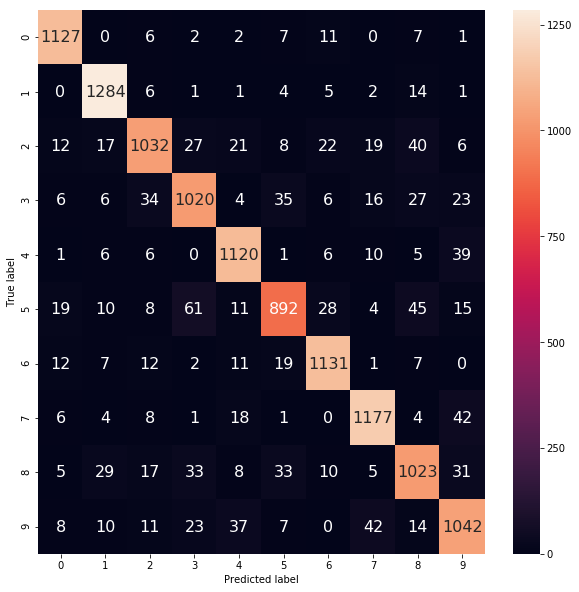

Accuracy:  0.904
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1163
           1       0.94      0.97      0.95      1318
           2       0.91      0.86      0.88      1204
           3       0.87      0.87      0.87      1177
           4       0.91      0.94      0.92      1194
           5       0.89      0.82      0.85      1093
           6       0.93      0.94      0.93      1202
           7       0.92      0.93      0.93      1261
           8       0.86      0.86      0.86      1194
           9       0.87      0.87      0.87      1194

   micro avg       0.90      0.90      0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [113]:
# Configuration 4: feature = transformed images, regularization = l2
logisticRegression = LogisticRegression(penalty = 'l2')
logisticRegression.fit(feature2_training_set, labels_train)
predictionsConfig4 = logisticRegression.predict(feature2_dev_set)
experimentEvaluation(labels_dev, predictionsConfig4)

c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anushree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


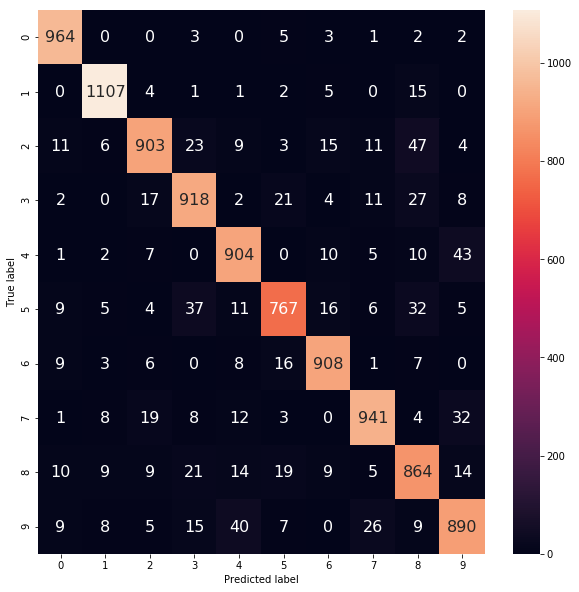

Accuracy:  0.9166
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.90      0.92      0.91       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.85      0.89      0.87       974
           9       0.89      0.88      0.89      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [146]:
# Testing on Test Data
training_set = np.concatenate((feature1_training_set, feature1_dev_set), axis=0)
# print(training_set.shape)
# print(np.concatenate((labels_train, labels_dev), axis=0).shape)
logisticRegression = LogisticRegression(penalty = 'l1')
logisticRegression.fit(complete_training, train_labels)
predictions = logisticRegression.predict(feature1_test_set)
experimentEvaluation(labels_test, predictions.reshape((10000, 1)))